In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = r"C:\Users\sarah\OneDrive\Documents\data.csv"

In [4]:
df = pd.read_csv(file_path)
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
df.shape

(4600, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'],axis=1)
y = df['price']

In [10]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [11]:
train_data = X_train.join(y_train)
train_data

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
3866,2014-07-02 00:00:00,3.0,3.00,1820,1641,3.0,0,0,3,1540,280,2006,0,10 W Etruria St,Seattle,WA 98119,USA,625000.0
418,2014-05-09 00:00:00,4.0,4.25,5860,52889,2.0,0,0,4,4910,950,1996,0,13905 184th Ave NE,Woodinville,WA 98072,USA,1157200.0
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,550000.0
4310,2014-05-08 00:00:00,2.0,3.00,3160,66646,2.0,0,0,3,3160,0,1993,0,22819 NE 166th St,Woodinville,WA 98077,USA,589900.0
1377,2014-05-27 00:00:00,3.0,2.50,2810,7700,2.0,0,0,3,2810,0,2001,0,6231 Lake Washington Blvd SE,Bellevue,WA 98006,USA,685000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,2014-05-16 00:00:00,3.0,2.25,1440,7673,1.0,0,0,3,940,500,1982,0,22119 123rd Ave SE,Kent,WA 98031,USA,249000.0
9,2014-05-02 00:00:00,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,640000.0
4287,2014-07-10 00:00:00,6.0,2.75,2980,5000,1.5,0,0,3,2480,500,1916,1986,5428 Kirkwood Pl N,Seattle,WA 98103,USA,775000.0
1649,2014-05-30 00:00:00,4.0,2.75,2620,6019,2.0,0,0,3,2620,0,2013,1923,1107 SE 10th St,North Bend,WA 98045,USA,499431.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

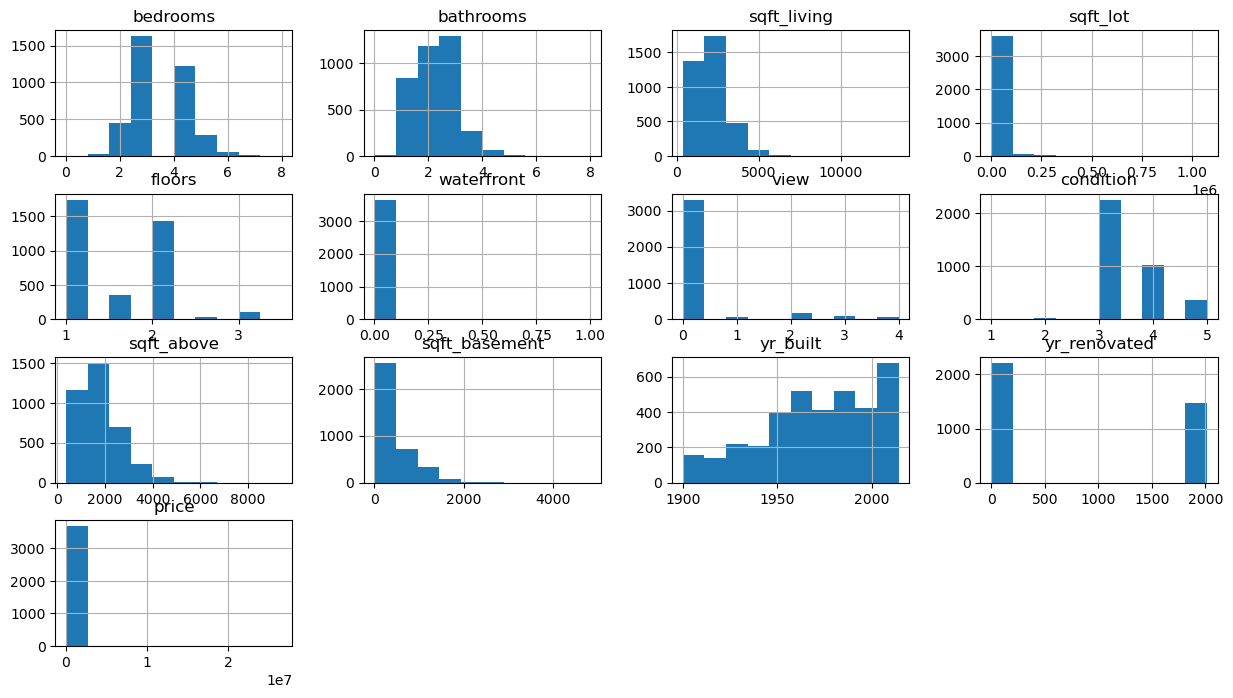

In [12]:
train_data.hist(figsize=(15, 8))

C:\Users\sarah\AppData\Local\Temp\ipykernel_1084\3650411037.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

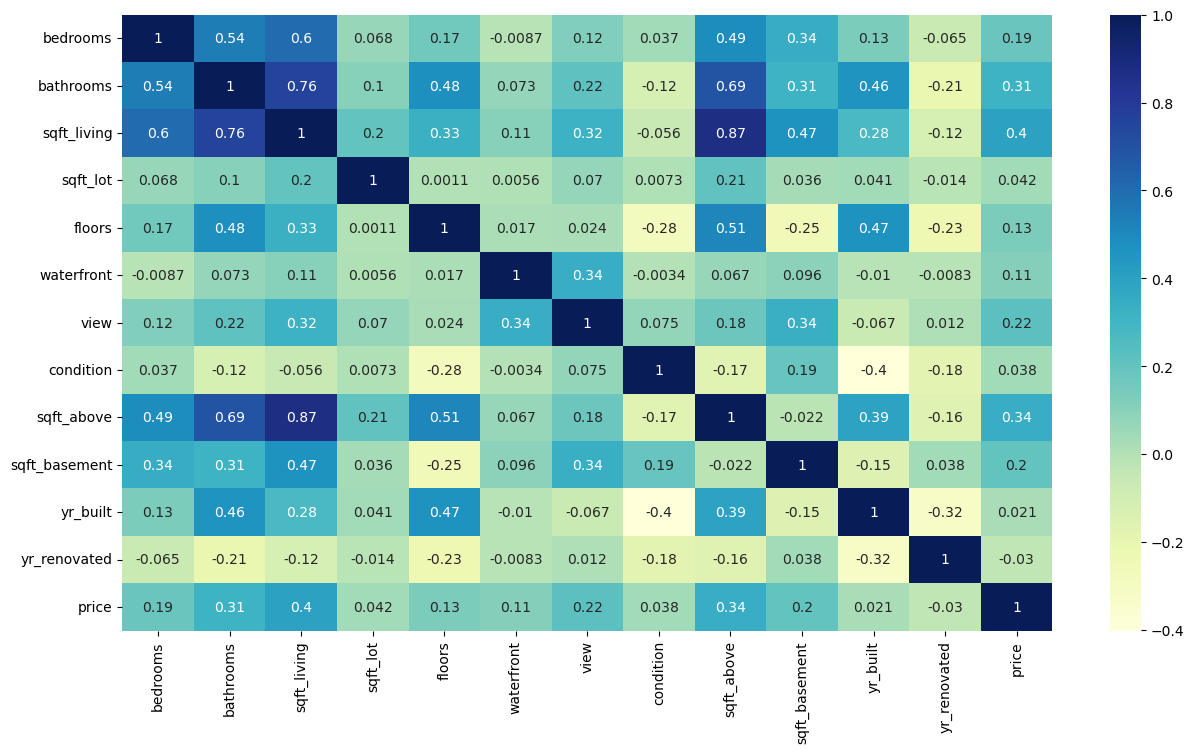

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [14]:
train_data['bedrooms'] = np.where(train_data['bedrooms'] == 1, 0, np.log(train_data['bedrooms']))
train_data['bathrooms'] = np.where(train_data['bathrooms'] == 1, 0, np.log(train_data['bathrooms']))
train_data['floors'] = np.where(train_data['floors'] == 1, 0, np.log(train_data['floors']))
train_data['condition'] = np.where(train_data['condition'] == 1, 0, np.log(train_data['condition']))


C:\Users\sarah\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 2.0794415416798357] is not finite

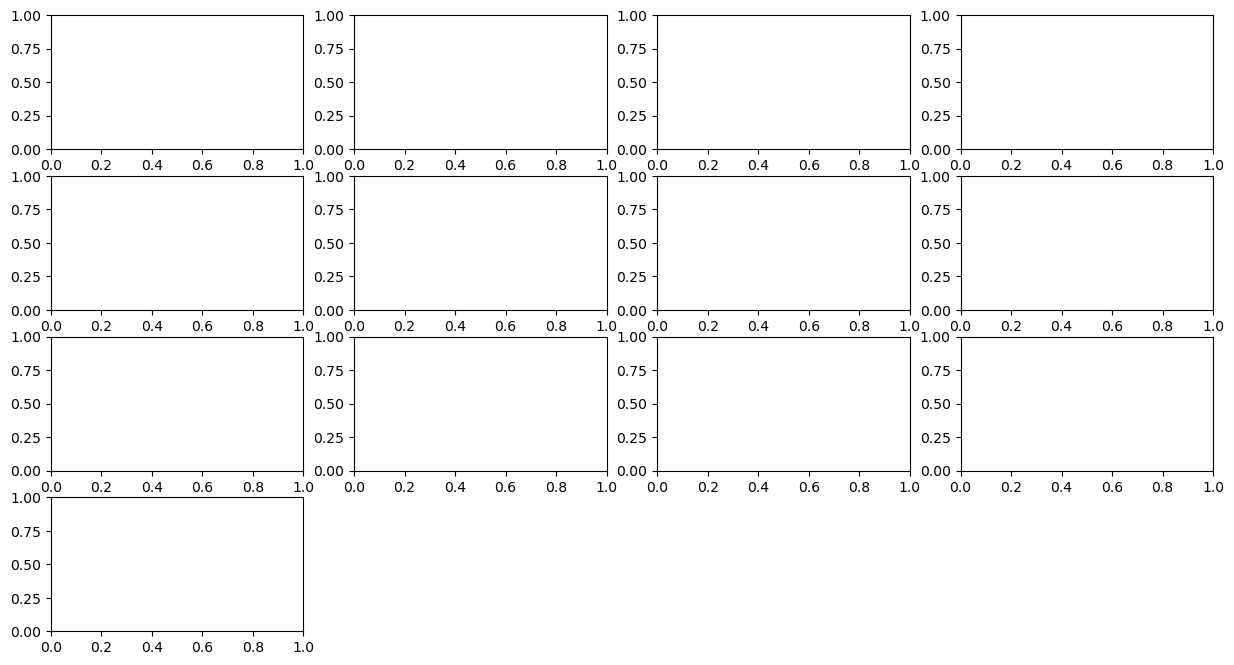

In [15]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.sqft_living.value_counts()

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data['sqft_living'])).drop(['sqft_living'], axis=1)
train_data

<Axes: xlabel='yr_built', ylabel='price'>

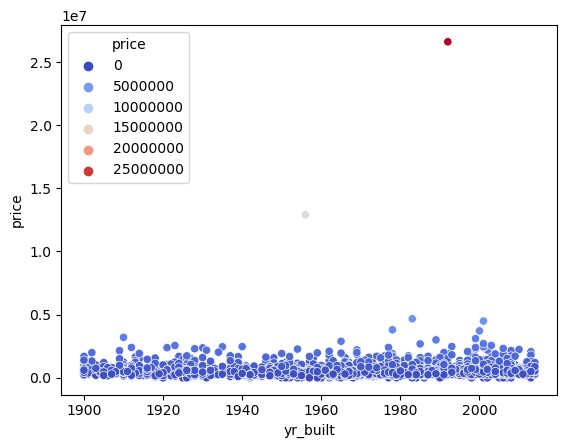

In [16]:
sns.scatterplot(x="yr_built", y="price", data=train_data, hue="price", palette="coolwarm")

In [17]:
train_data['bedroom_ratio'] = train_data['bedrooms'] / train_data['bathrooms']

C:\Users\sarah\AppData\Local\Temp\ipykernel_1084\1811937681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

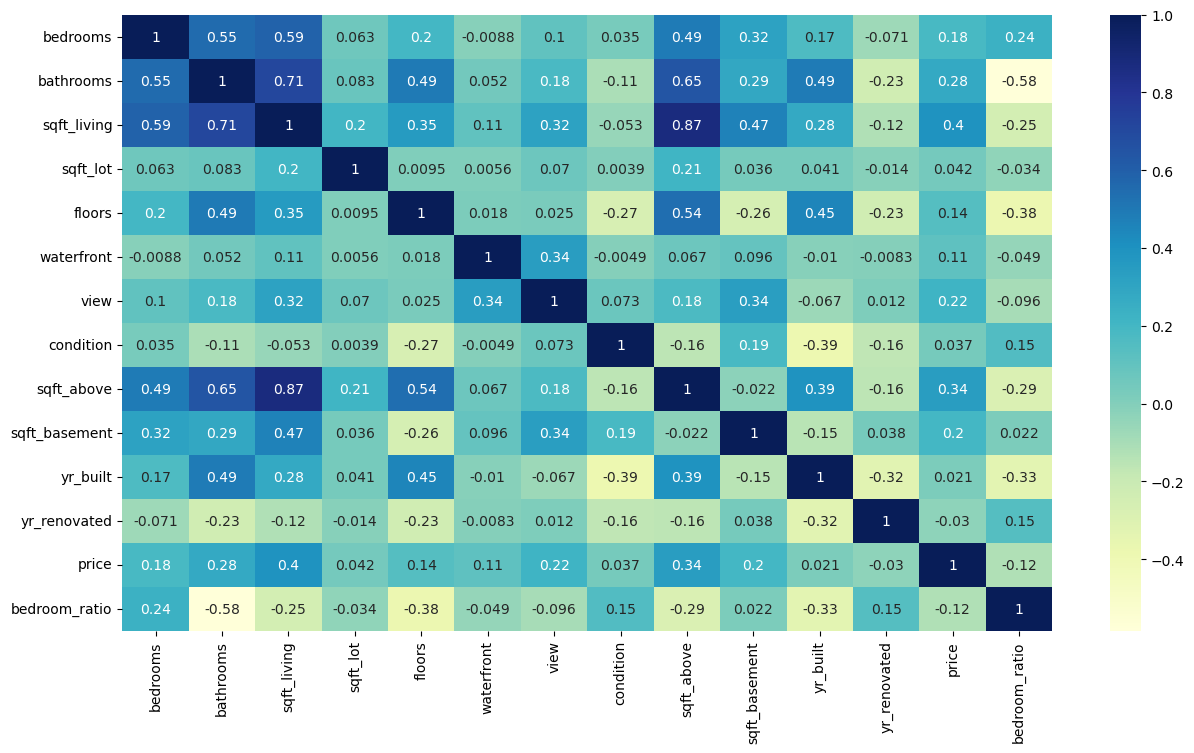

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [21]:
# Replace missing values
df['sqft_basement'].fillna(df['sqft_basement'].mean(), inplace=True)

In [22]:
# Convert the `date` column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [23]:
# Clean up the data format
df['street'] = df['street'].str.replace('-', ' ')

In [24]:
# Save the cleaned data to a new file
df.to_csv('cleaned_data.csv', index=False)

In [25]:
# Read the cleaned data into a Pandas DataFrame
df = pd.read_csv('cleaned_data.csv')

In [26]:
# Define columns to check for outliers
columns_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

# Detect outliers using the IQR method
outliers = []
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)

# Drop duplicate indices
outliers = list(set(outliers))

# Print the list of outlier indices
print("Outliers indices:", outliers)

Outliers indices: [2048, 1, 7, 8, 2057, 2056, 11, 2060, 2061, 14, 4108, 4109, 4113, 4114, 4117, 4120, 2073, 4122, 2075, 28, 2079, 32, 34, 2083, 35, 4132, 38, 4135, 4136, 39, 4138, 2086, 4139, 2093, 2094, 4142, 4143, 46, 49, 50, 51, 53, 2097, 2102, 56, 57, 2106, 4148, 2108, 2109, 62, 2110, 4157, 70, 2119, 4166, 4169, 74, 2121, 4172, 4173, 4174, 77, 2128, 83, 4183, 4088, 4184, 2138, 2139, 92, 91, 2143, 2145, 99, 100, 2148, 4196, 2152, 4200, 4202, 107, 4204, 2155, 2156, 2157, 2159, 4209, 113, 4212, 2166, 119, 2168, 4216, 122, 2170, 118, 4501, 133, 2181, 2183, 2184, 4233, 2186, 4229, 4234, 4237, 143, 2193, 2194, 4243, 148, 4246, 2199, 154, 2202, 4252, 2206, 4254, 160, 4259, 163, 4261, 4262, 164, 170, 4266, 172, 4273, 2226, 179, 4277, 2233, 4282, 4283, 4284, 189, 4286, 4287, 2239, 193, 4289, 192, 2242, 197, 2245, 2243, 201, 2250, 4301, 2254, 4304, 209, 4306, 2261, 214, 4310, 2264, 217, 2262, 223, 227, 4323, 4325, 4324, 2279, 2280, 233, 4326, 4328, 2284, 2276, 2286, 240, 241, 4338, 244, 4341

In [27]:
# Feature engineering
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek

df['total_area'] = df['sqft_above'] + df['sqft_basement']
df['property_age'] = df['year'].max() - df['yr_built']

df['recently_renovated'] = (df['year'] - df['yr_renovated']) <= 5

In [28]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['city', 'statezip', 'country'])

# Calculate ratio features
df['living_area_ratio'] = df['sqft_above'] / df['total_area']

# Interaction features
df['bed_bath_ratio'] = df['bedrooms'] * df['bathrooms']

# Print the modified DataFrame
print(df)

           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condition  ...  statezip_WA 98177  \
0     

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\sarah\OneDrive\Documents\data.csv"
df = pd.read_csv(file_path)

In [30]:
# Drop any rows with missing values (you can handle missing values differently if needed)
df.dropna(inplace=True)

In [31]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
target = 'price'

In [32]:
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Print the shapes of the datasets
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3680, 12)
y_train shape: (3680,)
X_test shape: (920, 12)
y_test shape: (920,)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

In [35]:
# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [37]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [38]:
# Print the evaluation results
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train RMSE: 254489.35382490707
Test RMSE: 993439.3625461654
Train R-squared: 0.544185359314763
Test R-squared: 0.03228385663277078


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Load the dataset
file_path = r"C:\Users\sarah\OneDrive\Documents\data.csv"
df = pd.read_csv(file_path)

# Drop any rows with missing values
df.dropna(inplace=True)

In [41]:
# Define features (X) and target variable (y)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
target = 'price'

In [42]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Example values of hyperparameter to try

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_ridge = grid_search.best_estimator_


In [43]:
# Make predictions
y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [44]:
# Print the evaluation results and best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Best Hyperparameters: {'alpha': 100}
Train RMSE: 254588.7250673798
Test RMSE: 992889.7135775717
Train R-squared: 0.5438293231213863
Test R-squared: 0.03335439410990282


In [45]:
import joblib

# Save the trained model to a file
model_filename = 'trained_model.pkl'
joblib.dump(best_ridge, model_filename)

['trained_model.pkl']